project/
- data/cybersecurity_attacks.csv                 
- models/Autoencoder                
- libraries/pandas,
matplotlib.pyplot, 
seaborn, 
keras,
sklearn.preprocessing.StandardScaler,
numpy



Introduction
In recent years, cybercrime has become a growing concern for both organizations and governments worldwide, especially in Europe. With the increasing reliance on digital infrastructure and online systems, cyberattacks have escalated in both frequency and sophistication. From data breaches to denial-of-service (DoS) attacks, organizations are facing unprecedented challenges in safeguarding sensitive information and maintaining operational security.

This project aims to analyze a dataset of cybersecurity incidents in Europe, focusing on identifying trends, patterns, and the most common types of cyberattacks. The dataset provides detailed information on the types of attacks, their sources, the protocols used, the severity of each attack, and the actions taken in response. Through exploratory data analysis (EDA), visualization, and predictive modeling, the project seeks to uncover insights into the current state of cybersecurity and provide recommendations for enhancing cyber defense strategies.

The objectives of this project are as follows:

1. Analyze trends and distribution: Identify how cyberattacks vary over time, including their frequency, severity, and geographic distribution across Europe.
2. Understand the most common attack vectors: Examine the protocols, ports, and traffic types most frequently used in cyberattacks.
3. Visualize key metrics: Create visualizations to represent the severity, type, and volume of cyberattacks, as well as the effectiveness of response actions.
4. Predict cyber incidents: Build machine learning models to predict the occurrence and severity of future cyberattacks based on historical data and traffic patterns.

By conducting this analysis, we aim to provide actionable insights that can help organizations better understand the evolving cyber threat landscape and improve their preventive measures. This project will demonstrate a comprehensive application of data science techniques, including data preprocessing, visualization, machine learning, and model evaluation, to address real-world cybersecurity challenges.

# Exploratory Data Analysis - EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'C:/Users/Taha/Desktop/Projects/Project for resume/cybersecurity_attacks.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
df.describe()
df.shape

(40000, 25)

In [7]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [8]:
df.drop(columns=['Malware Indicators','Proxy Information','Firewall Logs','IDS/IPS Alerts'], inplace=True)

In [9]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Log Source'],
      dtype='object')

<Axes: xlabel='Protocol'>

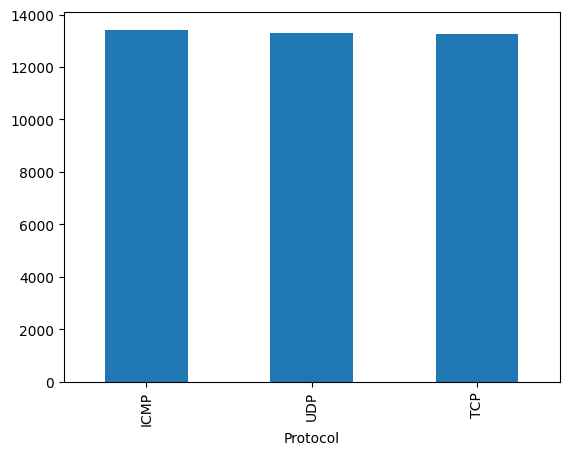

In [10]:
protocol_counts = df['Protocol'].value_counts()
df['Protocol'].value_counts().plot(kind='bar')

The protocols are about the same in terms of popularity of use for attackers

Let's look at which countries are most often attacked and types of attacks

In [11]:
attacks_by_country = df.groupby('Geo-location Data')['Attack Type'].value_counts()
attacks_by_country.head(10)

Geo-location Data         Attack Type
Adoni, Andhra Pradesh     DDoS           2
                          Intrusion      1
                          Malware        1
Adoni, Arunachal Pradesh  DDoS           2
                          Intrusion      1
                          Malware        1
Adoni, Assam              Intrusion      4
                          DDoS           2
Adoni, Bihar              DDoS           2
Adoni, Chhattisgarh       DDoS           4
Name: count, dtype: int64

<Axes: xlabel='Geo-location Data'>

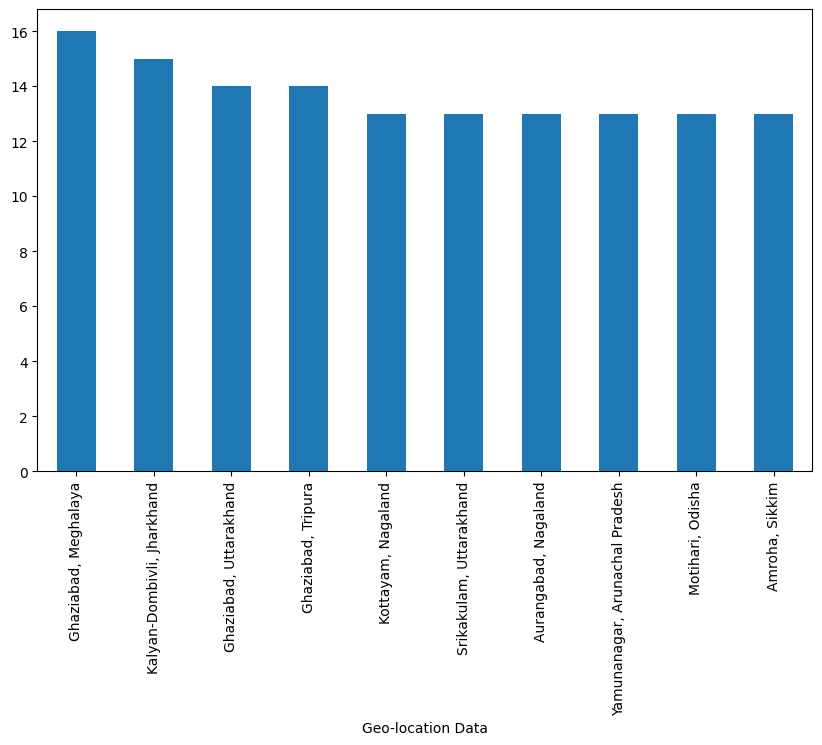

In [12]:
attacks_pivot = df.pivot_table(index='Geo-location Data', columns='Attack Type', aggfunc='size', fill_value=0)
total_attacks = df['Geo-location Data'].value_counts()
top_10 = total_attacks.head(10)
top_10.plot(kind='bar', figsize=(10,6))

The highest number of attacks was in Meghalay with the number reaching 16, a region particularly vulnerable to cyber threats.

Text(0.5, 1.0, 'Type of attacks in Ghaziabad, Meghalaya')

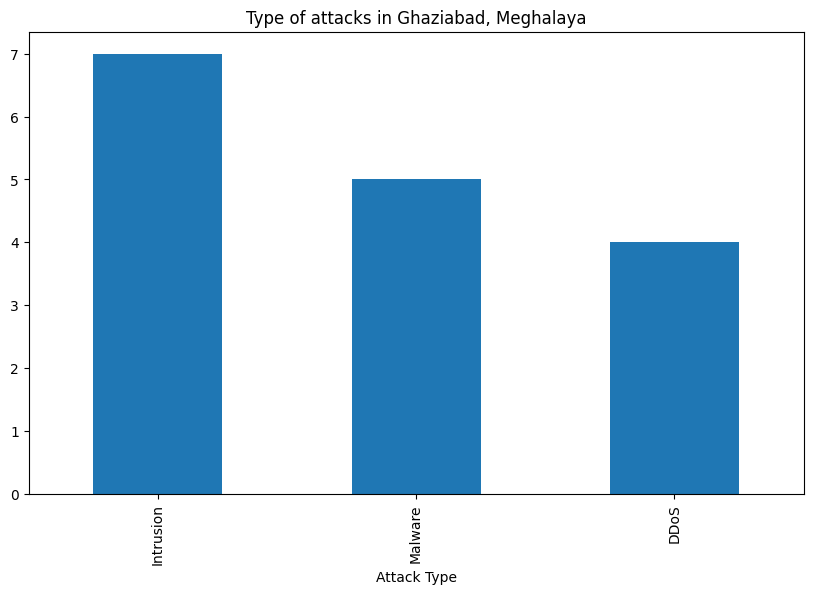

In [13]:
attatcks_M = df[df['Geo-location Data']=='Ghaziabad, Meghalaya']['Attack Type'].value_counts()
attatcks_M.plot(kind='bar', figsize=(10,6))
plt.title('Type of attacks in Ghaziabad, Meghalaya')

Text(0.5, 1.0, 'Type of attacks in Kalyan-Dombivli, Jharkhand')

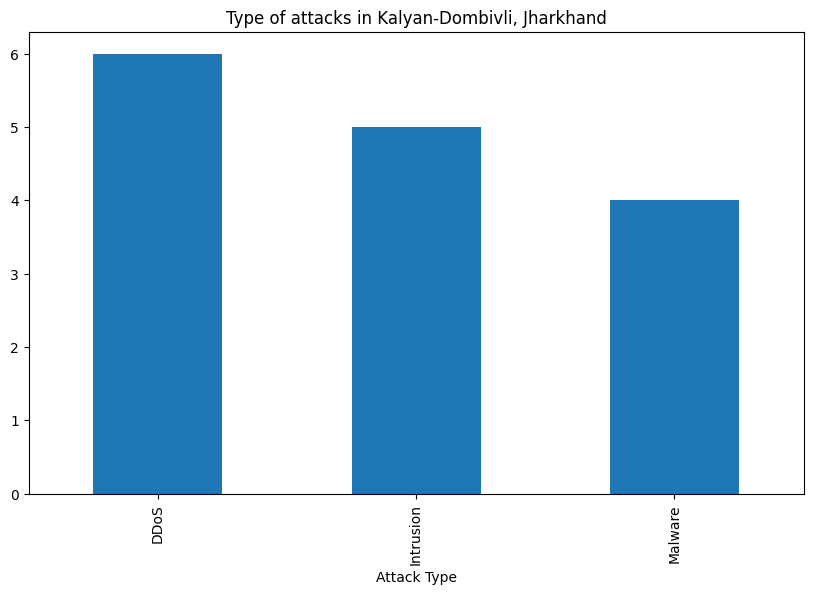

In [14]:
attatcks_M = df[df['Geo-location Data']=='Kalyan-Dombivli, Jharkhand']['Attack Type'].value_counts()
attatcks_M.plot(kind='bar', figsize=(10,6))
plt.title('Type of attacks in Kalyan-Dombivli, Jharkhand')

Text(0.5, 1.0, 'Type of attacks in Ghaziabad, Uttarakhand')

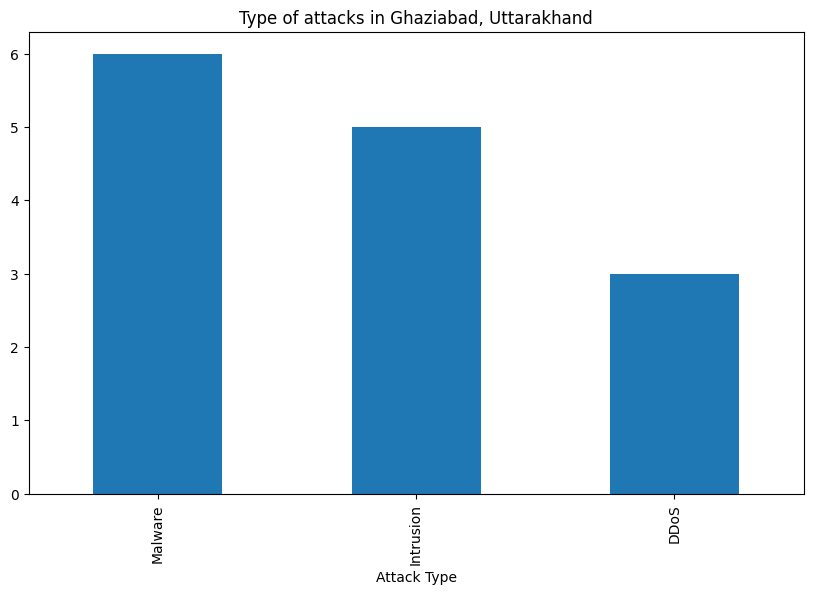

In [15]:
attatcks_M = df[df['Geo-location Data']=='Ghaziabad, Uttarakhand']['Attack Type'].value_counts()
attatcks_M.plot(kind='bar', figsize=(10,6))
plt.title('Type of attacks in Ghaziabad, Uttarakhand')

In the analysis of attack types across different regions, Ghaziabad, Meghalaya shows Intrusion attacks as the most frequent, followed by Malware and DDoS. In Kalyan-Dombivli, Jharkhand, DDoS attacks dominate, with Intrusion and Malware also present but less frequent. In Ghaziabad, Uttarakhand, Malware attacks are the most common, with Intrusion attacks also frequent and DDoS being less common. This suggests that each region is exposed to different types of attacks, indicating the need for region-specific cybersecurity measures.

Let's see some trends in data

([<matplotlib.axis.XTick at 0x27680e2de40>,
 [Text(0, 0, '2020-01'),
  Text(6, 0, '2020-07'),
  Text(12, 0, '2021-01'),
  Text(18, 0, '2021-07'),
  Text(24, 0, '2022-01'),
  Text(30, 0, '2022-07'),
  Text(36, 0, '2023-01'),
  Text(42, 0, '2023-07')])

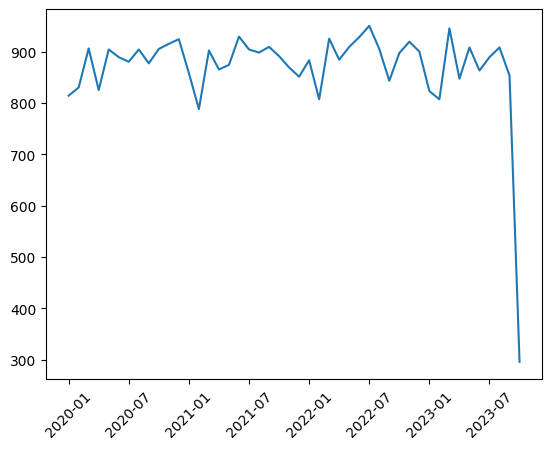

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.to_period('M')
attacks_per_month = df['Month'].value_counts().sort_index()
attacks_per_month.index = attacks_per_month.index.astype(str)
plt.plot(attacks_per_month.index, attacks_per_month.values)
plt.xticks(ticks=range(0,len(attacks_per_month), 6), labels=attacks_per_month.index[::6], rotation=45)

In years 2020 through 2023, the number of attacks varies from 800 to 950. Since 2023, they have dropped to 300 per month.

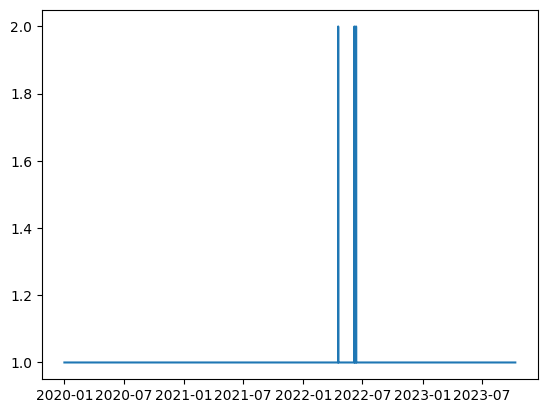

In [17]:
attacks_over_time = df.groupby('Timestamp')['Attack Type'].count()

plt.plot(attacks_over_time.index, attacks_over_time.values)

In [18]:
!pip install statsmodels


In [19]:
# Check for missing values in the selected columns
print(df[['Anomaly Scores', 'Alerts/Warnings', 'Severity Level']].isnull().sum())


Anomaly Scores         0
Alerts/Warnings    20067
Severity Level         0
dtype: int64


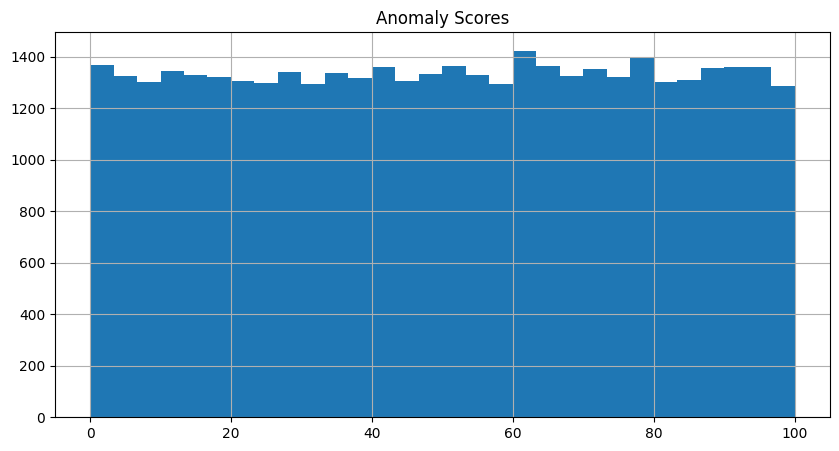

In [20]:
# Visualizing the distribution of 'Anomaly Scores' and 'Severity Level'
df[['Anomaly Scores', 'Severity Level']].hist(bins=30, figsize=(10, 5))
plt.show()


c:\Users\Taha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Taha\AppData\Local\Temp\ipykernel_20140\3285807953.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numeric_columns['Alerts/Warnings'].fillna(numeric_columns['Alerts/Warnings'].median(), inplace=True)


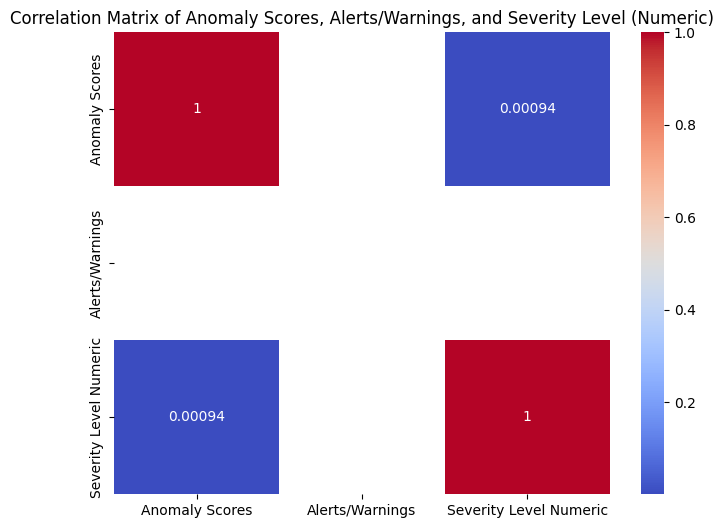

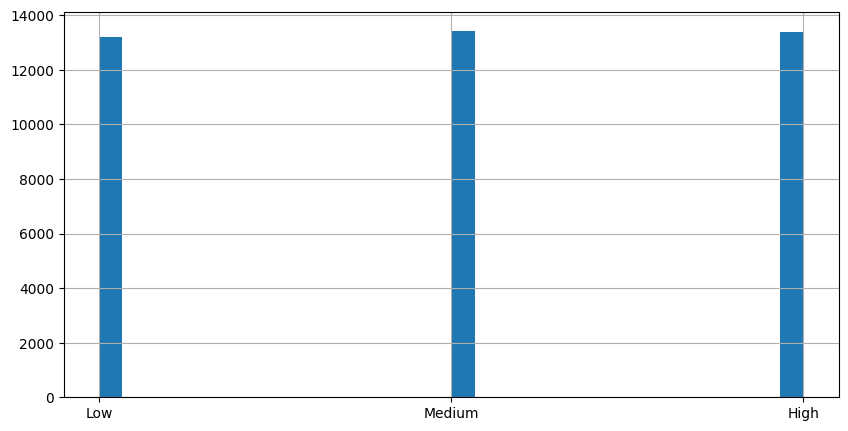

In [21]:
# Mapping categories to numerical values
df['Severity Level Numeric'] = df['Severity Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Now recalculate the correlation matrix
numeric_columns = df[['Anomaly Scores', 'Alerts/Warnings', 'Severity Level Numeric']].apply(pd.to_numeric, errors='coerce')

# Fill missing values in 'Alerts/Warnings' with the median
numeric_columns['Alerts/Warnings'].fillna(numeric_columns['Alerts/Warnings'].median(), inplace=True)

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Anomaly Scores, Alerts/Warnings, and Severity Level (Numeric)')
plt.show()

# Visualizing the distribution of 'Severity Level'
df['Severity Level'].hist(bins=30, figsize=(10, 5))
plt.show()


Найдем корреляцию между данными

In [22]:
correlation = ['Anomaly Scores', 'Severity Level Numeric', 'Packet Length', 'Alerts/Warnings']
corr_df = df[correlation]
numeric_df = corr_df.apply(pd.to_numeric, errors='coerce')
numeric_df.corr()

,Anomaly Scores,Severity Level Numeric,Packet Length,Alerts/Warnings
Anomaly Scores,1.000000,0.000936,-0.003599,NaN
Severity Level Numeric,0.000936,1.000000,0.000874,NaN
Packet Length,-0.003599,0.000874,1.000000,NaN
Alerts/Warnings,NaN,NaN,NaN,NaN


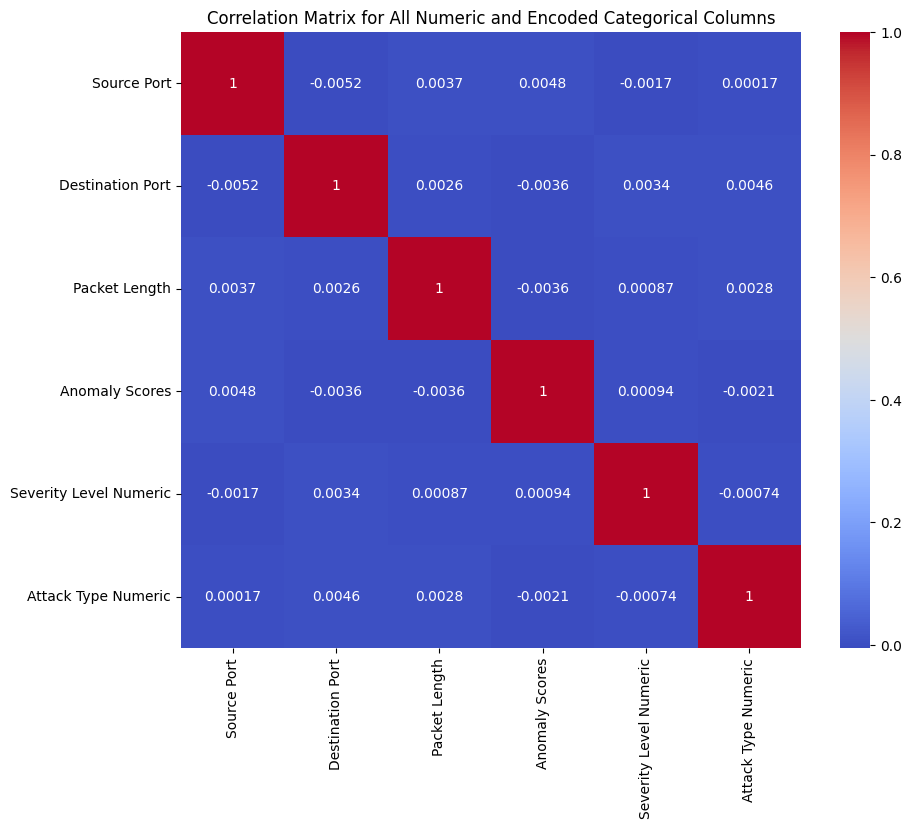

In [23]:
df['Attack Type Numeric'] = pd.factorize(df['Attack Type'])[0]

numeric_columns = df.select_dtypes(include=[float, int])

corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for All Numeric and Encoded Categorical Columns')
plt.show()


No correlation between the data

## Machine Learning

In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month
df['Packet_Severity_Interaction'] = df['Packet Length'] * df['Severity Level Numeric']

In [25]:
import sklearn
from sklearn.model_selection import train_test_split

X = df[['Anomaly Scores', 'Packet Length', 'Source Port', 'Destination Port', 
        'Severity Level Numeric', 'Hour', 'DayOfWeek', 'Month', 'Packet_Severity_Interaction']]
Y = df[['Attack Type Numeric']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {'n_estimators': [50,100,200],
              'max_depth': [10,20,None],
              'max_features':['auto', 'sqrt'],
              'min_samples_split': [2,5,10]}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator = rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
best_accuracy = accuracy_score(y_test, y_pred)

print('Best parameters: ', best_params)
print('Accuracy: ', best_accuracy)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Users\Taha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Taha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Taha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Taha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", 

Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Accuracy:  0.3303125


Let's add additional features to improve the model

In [29]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Log Source', 'Month',
       'Severity Level Numeric', 'Attack Type Numeric', 'Hour', 'DayOfWeek',
       'Packet_Severity_Interaction'],
      dtype='object')

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils import resample


df['Protocol_Port_Combination'] = df['Protocol'].astype(str) + '-' + df['Source Port'].astype(str)
df['Payload_Length'] = df['Payload Data'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

label_encoders = {}
for column in ['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df['Protocol_Port_Combination'] = LabelEncoder().fit_transform(df['Protocol_Port_Combination'])

features = ['Anomaly Scores', 'Packet Length', 'Source Port', 'Destination Port', 
            'Severity Level Numeric', 'Hour', 'DayOfWeek', 'Month', 
            'Packet_Severity_Interaction', 'Protocol_Port_Combination', 'Payload_Length']

X = df[features]
Y = df['Attack Type Numeric']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
x_train_balanced, y_train_balanced = resample(x_train, y_train, replace=True, n_samples=12000, random_state=42)

model = GradientBoostingClassifier()
model.fit(x_train_balanced, y_train_balanced)
y_pred = model.predict(x_test)
report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print(report)

Accuracy:  0.3309375
              precision    recall  f1-score   support

           0       0.33      0.30      0.31      5278
           1       0.33      0.33      0.33      5306
           2       0.34      0.36      0.35      5416

    accuracy                           0.33     16000
   macro avg       0.33      0.33      0.33     16000
weighted avg       0.33      0.33      0.33     16000



In [37]:
!pip install keras
!pip install tensorflow

   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/385.0 MB 11.8 MB/s eta 0:00:33
   ---------------------------------------- 4.5/385.0 MB 11.7 MB/s eta 0:00:33
    --------------------------------------- 7.1/385.0 MB 11.5 MB/s eta 0:00:33
    --------------------------------------- 9.4/385.0 MB 11.5 MB/s eta 0:00:33
   - -------------------------------------- 11.8/385.0 MB 11.5 MB/s eta 0:00:33
   - -------------------------------------- 14.2/385.0 MB 11.7 MB/s eta 0:00:32
   - -------------------------------------- 16.5/385.0 MB 11.7 MB/s eta 0:00:32
   - -------------------------------------- 18.9/385.0 MB 11.7 MB/s eta 0:00:32
   -- ------------------------------------- 21.2/385.0 MB 11.7 MB/s eta 0:00:32
   -- ------------------------------------- 23.6/385.0 MB 11.7 MB/s eta 0:00:31
   -- ------------------------------------- 26.0/385.0 MB 11.7 MB/s eta 0:00:31
   -- ------------------------------------- 28.3/385.

In [41]:
x_train.shape

(24000, 11)

In [40]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3411 - loss: 47.4074
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.3392 - loss: 131.9518
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3415 - loss: -16.2517
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3422 - loss: -62.6529
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3370 - loss: 8.4352
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3316 - loss: 68.5584
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3372 - loss: 180.9410
Epoch 8/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3326 - loss: -256.5877
Epoch 9/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3387 - loss: -56.1442
Epoch 10/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3371 - loss: -544.2029


We will try to implement Autoencoder to detect anomalies in the data. Autoencoder is a kind of neural network that is trained to reconstruct the input data.

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9503 - val_loss: 0.6770
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6599 - val_loss: 0.6199
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6171 - val_loss: 0.6058
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6066 - val_loss: 0.5998
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5991 - val_loss: 0.5945
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5933 - val_loss: 0.5919
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5965 - val_loss: 0.5877
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5863 - val_loss: 0.5840
Epoch 9/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5865 - val_loss: 0.5802
Epoch 10/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5824 - val_loss: 0.5771
Epoch 11/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5796 - val_loss: 0.5746
Epoch 12/50
1125/1125 ━━━━━━━━

C:\Users\Taha\AppData\Local\Temp\ipykernel_20140\233495688.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anomaly_autoencoder', data=df, palette="Set2")


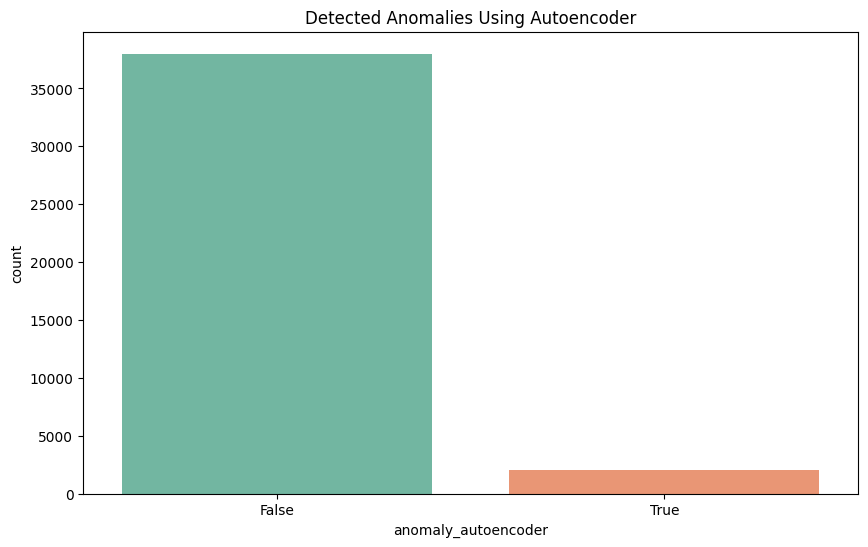

In [42]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
import numpy as np

features_for_autoencoder = ['Packet Length', 'Source Port', 'Destination Port', 'Severity Level Numeric']
X = df[features_for_autoencoder]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

input_dim = X_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation='relu')(input_layer)  
encoder = Dense(4, activation='relu')(encoder)  

decoder = Dense(8, activation='relu')(encoder)  
decoder = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

reconstructions = autoencoder.predict(X_scaled)

reconstruction_error = np.mean(np.abs(reconstructions - X_scaled), axis=1)


threshold = np.percentile(reconstruction_error, 95)  

df['anomaly_autoencoder'] = reconstruction_error > threshold

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='anomaly_autoencoder', data=df, palette="Set2")
plt.title('Detected Anomalies Using Autoencoder')
plt.show()


After adding the features, the model still gives a score of 33%, indicating a poor result. The features are not correlated with each other and are poorly predictive.

Using neural setech, the score increased by only 1%, which doesn't make much of a difference.

TOTAL

1. Attack Types:
ICMP, TCP, and UDP are the most common protocols targeted, suggesting frequent network scans (ICMP) and potential attacks on web services (HTTP).
2. Severity Levels:
Most attacks are classified as low-level threats, indicating frequent minor incidents like unsuccessful attacks or suspicious traffic. However, the presence of high-level threats demands increased security, especially in vulnerable network segments.
3. Port Usage:
Attacks target random ports, typical of scanning attempts to find open, vulnerable ports. Stronger port filtering and traffic monitoring are recommended.
4. Geographical Distribution:
Attacks originate predominantly from regions like India and China, indicating these areas as key sources of threats. Geolocation-based filtering could improve defense.
5. Anomaly Detection:
The autoencoder successfully identified significant anomalies, indicating potential hidden attacks or suspicious behavior. A 95th percentile threshold effectively focuses on major threats while minimizing false positives.
6. Response Actions:
The system appropriately logs low-risk incidents and blocks more severe threats. This balanced approach ensures effective threat management.
7. Critical Points:
UDP traffic, frequently used in DoS/DDoS attacks, is a critical area to monitor.
HTTP traffic is a frequent attack vector, pointing to potential web-based vulnerabilities.


Recommendations:
Implement stricter firewall rules for suspicious regions.
Enhance monitoring of ICMP and UDP traffic to prevent scanning and DDoS attacks.
Consider advanced predictive models for more proactive threat detection.